In [1]:
import pandas as pd
df=pd.read_csv("d:/data/iris/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
cols=df.columns[0:-2]
X=df[cols]
y=df['Species']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_score=model.decision_function(X)
y_score

array([[  6.70082448,   2.86780209,  -9.56862656],
       [  6.34361969,   2.95342261,  -9.2970423 ],
       [  6.83119372,   2.81816212,  -9.64935584],
       [  6.31548535,   2.79739849,  -9.11288383],
       [  6.82761439,   2.79650424,  -9.62411863],
       [  6.02513771,   2.66024036,  -8.68537807],
       [  6.70918486,   2.62131003,  -9.33049489],
       [  6.4191103 ,   2.85437366,  -9.27348397],
       [  6.45403959,   2.79254727,  -9.24658686],
       [  6.29893996,   2.9991018 ,  -9.29804176],
       [  6.52273526,   2.91134884,  -9.4340841 ],
       [  6.26418605,   2.76964739,  -9.03383344],
       [  6.48521418,   3.00034379,  -9.48555797],
       [  7.38487162,   2.82887176, -10.21374338],
       [  7.32834281,   2.99032964, -10.31867245],
       [  6.81079593,   2.62798578,  -9.43878171],
       [  6.9611145 ,   2.6895812 ,  -9.6506957 ],
       [  6.59876495,   2.78218538,  -9.38095033],
       [  5.92133738,   2.89454599,  -8.81588337],
       [  6.62653559,   2.67704

In [5]:
from sklearn.metrics import confusion_matrix
y_hat=model.predict(X_test)
confusion_matrix(y_test, y_hat, labels=[0,1,2])

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat,target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
# roc_curve() 함수는 이진 분류에만 지원된다
# 다중 클래스에 대해서는 ROC curve를 그릴 수 없으므로
# 각각의 클래스에 대해 별도로 ROC curve를 그려야 함

from sklearn.preprocessing import label_binarize
y=label_binarize(y, classes=[0,1,2])

{0: 1.0, 1: 0.46020000000000005, 2: 0.9967999999999999}


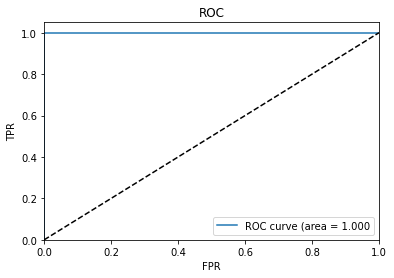

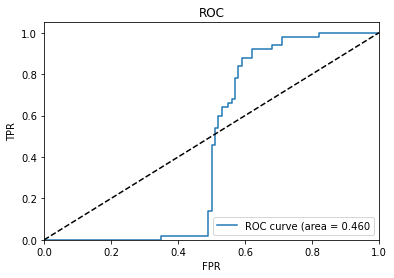

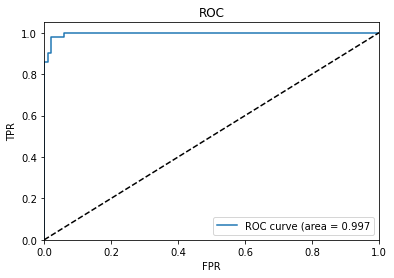

In [8]:
%matplotlib inline
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

n_classes=3

fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(n_classes):
    fpr[i], tpr[i], _=roc_curve(y[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

print(roc_auc)
y_score=model.decision_function(X)
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %.3f' % roc_auc[i])
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()